In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyse et correction du dataset

### Lecture du fichier

In [9]:
data = pd.read_csv('heart.csv', delimiter=';')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [ ]:
df = data.copy()

#### Dimension du dataset

In [ ]:
df.shape

### Types et valeurs manquantes par variable

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

Observations : 
 - Une ligne semble avoir des valeur nulle
 - HeartDisease et FastingBS ne sont pas au bon format

### Identification et suppression de la ligne "null"

In [ ]:
df[df['ChestPainType'].isna()]

In [ ]:
df = df.drop(793)

In [10]:
df.shape

NameError: name 'df' is not defined

In [11]:
df.isnull().sum()

NameError: name 'df' is not defined

### Changement du type de HeartDisease et FastingBS en object

In [12]:
df['FastingBS'] = df['FastingBS'].astype(int).astype(object)
df['HeartDisease'] = df['HeartDisease'].astype(int).astype(object)

NameError: name 'df' is not defined

In [13]:
df.info()

NameError: name 'df' is not defined

In [14]:
df.head()

NameError: name 'df' is not defined

### Distribution variable cible

In [ ]:
df['HeartDisease'].value_counts()

Observation : la classe est équilibré

### Analyse univarié variable quanti

In [15]:
import seaborn as sns

for col in df.select_dtypes(['float64','int64']):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(df[col], width= 0.3)

NameError: name 'df' is not defined

Osbervations :
 - Toutes les distributions suivent des lois normales
 - Une valeur à 0 pour RestingBP : outlier ? Valeur nulle ?
 - ~ 20% de valeur à 0 pour Choolesterol => impossible ce sont des valeurs nulles

### Remplacer les 0 par des valeurs nulles pour la variable Cholesterol

In [ ]:
df['Cholesterol'].loc[df['Cholesterol'] == 0] = None

In [16]:
df.isnull().sum()

NameError: name 'df' is not defined

### Identifier la ligne où RestingBP est null

In [17]:
df[df['RestingBP'] == 0]

NameError: name 'df' is not defined

Pas de valeur aberantes, on décide de remplacer la valeur par 0 plutot que de supprimer la ligne

In [18]:
df['RestingBP'].loc[df['RestingBP'] == 0] = None

NameError: name 'df' is not defined

In [19]:
df.isnull().sum()

NameError: name 'df' is not defined

### Analyse univarié quali

In [20]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

NameError: name 'df' is not defined

Observations : 
 - La variable Sex est mal configurée

In [21]:
df['Sex'].value_counts()

NameError: name 'df' is not defined

### Reconfiguration de la variable Sex

In [22]:
df['Sex'] = df['Sex'].replace(['Male','Female'], ['M','F'])

NameError: name 'df' is not defined

In [23]:
df['Sex'].value_counts()

NameError: name 'df' is not defined

### Affichage graphique variable qualitative

In [24]:
for col in df.select_dtypes('object') :
    plt.figure()
    
    plt.subplot(1,2,1)
    df[col].value_counts().plot(kind='bar')
    
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie()

NameError: name 'df' is not defined

Observations :
 - 'TA' de ChestPainTyep : peu de valeurs
 - 'Down' de ST_Slope : peu de valeurs

### Analyse bivariée

### variables numériques

In [25]:
positive_df = df[df['HeartDisease'] == 1]
negative_df = df[df['HeartDisease'] == 0]

NameError: name 'df' is not defined

In [26]:
positive_df['HeartDisease'].value_counts()

NameError: name 'positive_df' is not defined

In [27]:
negative_df['HeartDisease'].value_counts()

NameError: name 'negative_df' is not defined

In [28]:
for col in positive_df.select_dtypes(['float64','int64']):

    sns.histplot(positive_df[col], label = '1', kde=True, edgecolor=None)
    sns.histplot(negative_df[col], label = '0', kde=True, edgecolor=None)
    
    plt.legend()
    plt.show()


NameError: name 'positive_df' is not defined

Observations :
 - Les distributions de Age, MaxHr, Oldpeak semble significativement différente

### Analyse bivarié variable qualitative

In [29]:
for col in df.drop('HeartDisease', axis=1).select_dtypes('object'):
    
    plt.figure()
    sns.heatmap(pd.crosstab(df['HeartDisease'], df[col]), annot=True, fmt='d')

NameError: name 'df' is not defined

Observations :
 - ChestPainType TA : peu de valeurs et ne semble pas significative
 - FastingBS 0 : beaucoup de valeurs mais ne semble pas significative
 - RestingECG Normal : beaucoup de valeurs mais ne semble pas significative
 - ST_Slope Down : peu de valeurs et ne semble pas significative
 - ST_Slope Flat et Up, ExerciseAngina Yes : semble être les plus significatives

## Preprocessing

### Train - test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
trainset, testset = train_test_split(dfz, test_size=0.2, random_state=0)

NameError: name 'dfz' is not defined

In [32]:
trainset['HeartDisease'].value_counts()

NameError: name 'trainset' is not defined

In [33]:
testset['HeartDisease'].value_counts()

NameError: name 'testset' is not defined

### Encodage

In [34]:
df_encoded = pd.get_dummies(df, columns=list(df.drop('HeartDisease',axis=1).select_dtypes('object').columns), dtype=int)

NameError: name 'df' is not defined

In [35]:
df_encoded.head()

NameError: name 'df_encoded' is not defined

In [36]:
df_encoded.info()

NameError: name 'df_encoded' is not defined

### Création d'une fonction de preprocessing à appliquer sur notre trainset et testset

In [37]:
def preprocessing(df):
    
    #encodage
    df = pd.get_dummies(df, columns=list(df.drop('HeartDisease',axis=1).select_dtypes('object').columns), dtype=int)
    df['HeartDisease'] = df['HeartDisease'].astype('int')
    
    #gestion des valeurs manquantes
    df = df.dropna()
    
    #division variables explicatives et variable cible    
    X = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    
    return X, y

In [38]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

NameError: name 'trainset' is not defined

In [39]:
X_train.head()

NameError: name 'X_train' is not defined

# Construction du premier modèle

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

NameError: name 'X_train' is not defined

In [41]:
len(y_pred)

NameError: name 'y_pred' is not defined

# Evaluation du premier modèle

In [42]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

NameError: name 'y_test' is not defined

## Classification report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

## Learning curve

In [44]:
from sklearn.model_selection import learning_curve

N, train_score, val_score =learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(8,6))

plt.plot(N,train_score.mean(axis=1), label = 'train_score')
plt.plot(N,val_score.mean(axis=1), label = 'val_score')
plt.legend()

NameError: name 'X_train' is not defined

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
corr_mat = X_train.corr()

NameError: name 'X_train' is not defined

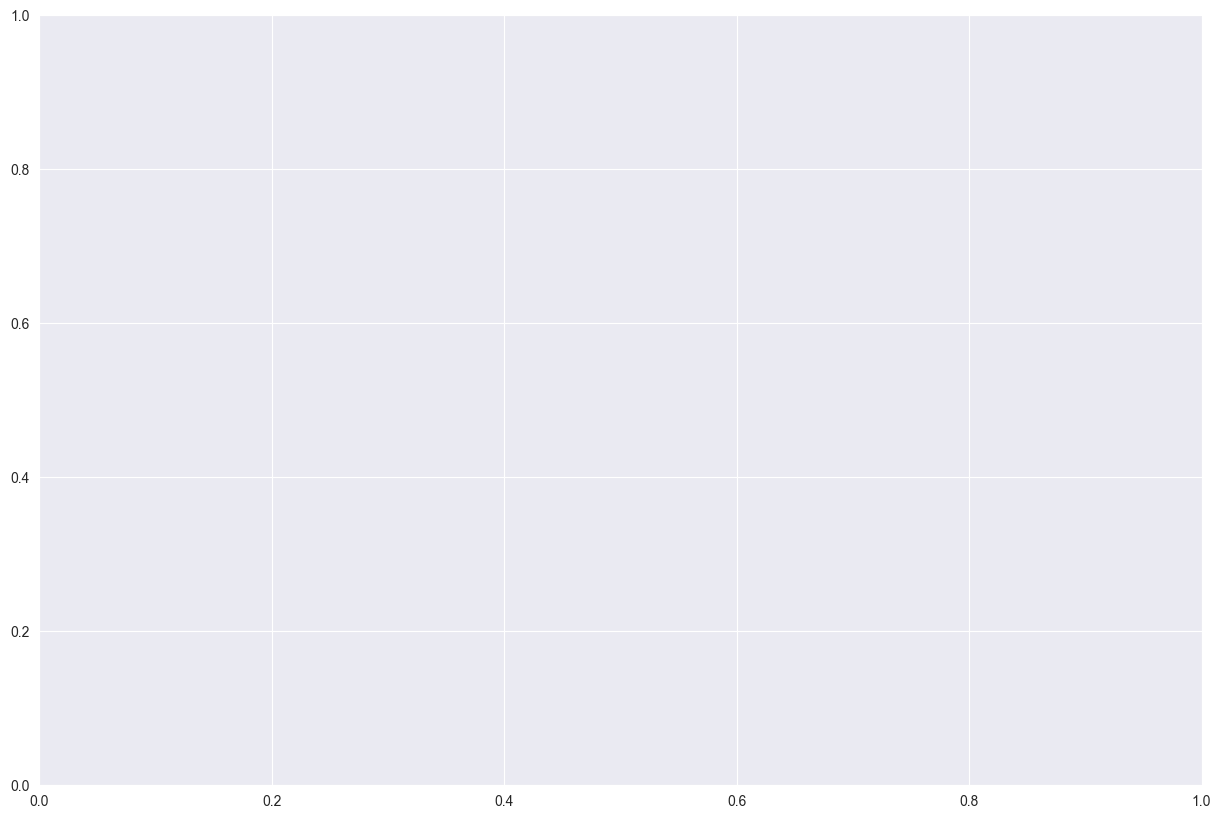

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))

In [48]:
ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt='.2f', cmap='Purples')

NameError: name 'corr_mat' is not defined

In [ ]:
ax.set_title('Matrice de corrélation')

In [ ]:
plt.show()

In [ ]:
X_train.var(axis=0)

# Fonction d'apprentissage et d'évaluation

In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocessing(dfZ):

    #encodage
    dfZ = pd.get_dummies(dfZ, columns=list(dfZ.drop('target',axis=1).select_dtypes('object').columns), dtype=int)
    dfZ['target'] = dfZ['target'].astype('int')

    #feature selection
    dfZ = dfZ.drop(['ft_5_categ_N', 'ft_7_categ_1', 'ft_12_categ_N', 'ft_13_categ_N', 'ft_14_categ_N','ft_6_categ_N', 'ft_6_categ_V', 'ft_8_categ_V', 'ft_9_categ_V', 'ft_10_categ_V', 'ft_11_categ_V', 'ft_12_categ_V', 'ft_13_categ_V', 'ft_14_categ_N', 'ft_14_categ_O', 'ft_14_categ_V', 'ft_15_categ_AUTRE', 'ft_15_categ_V', 'ft_16_categ_IDENTIQUE', 'ft_16_categ_V', 'ft_17_categ_N', 'ft_17_categ_V', 'ft_18_categ_V', 'ft_18_categ_eff' ], axis=1)


    #gestion des valeurs manquantes
    dfZ = dfZ.dropna()
    dfZ = dfZ.fillna(dfZ.mean())

    #division variables explicatives et variable cible
    X = dfZ.drop('target', axis=1)
    y = dfZ['target']

    #Standardisation
    X = StandardScaler().fit_transform(X)

    return X, y
def evaluation(model, X_train, y_train, X_test, y_test):
    #entrainement
    model.fit(X_train, y_train)

    #prediction
    y_prod = model.predict(X_test)

    #evaluation
    print(confusion_matrix(y_test, y_prod))

    print(classification_report(y_test, y_prod))

    #learning
    N, train_score, val_score =learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(8,6))

    plt.plot(N,train_score.mean(axis=1), label = 'train_score')
    plt.plot(N,val_score.mean(axis=1), label = 'val_score')
    plt.legend()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model, X_train, y_train, X_test, y_test)